In [12]:
#Include this line to make plots interactive
%matplotlib notebook

#Dependencies and Set up 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Study data files
Vaccine_2021_data = "Vaccine2021.csv"
Vaccine_2022_data = "Vaccine2022.csv"
Vaccine_2023_data = "Vaccine2023.csv"


# Read the 2021 data 
Vaccine_2021_data = pd.read_csv(Vaccine_2021_data, low_memory=False)
Vaccine_2021_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct
0,9/17/2021,104593.9,67758810,46673.6,0,0.0,67521425,53479.8,63669579,56554.1,17302228,78191.8
1,9/18/2021,271389.7,165354624,120641.2,0,0.0,164499439,138355.1,155164379,146311.8,41981968,202236.0
2,9/19/2021,271389.9,165593647,120834.2,0,0.0,164736544,138573.1,155365407,146521.8,41999109,202319.0
3,9/20/2021,271393.3,165966770,121105.9,0,0.0,165108383,138886.6,155679602,146821.2,42027581,202442.5
4,9/21/2021,271393.3,166090540,121245.7,0,0.0,165231110,139051.3,155783557,146979.2,42036379,202510.6
...,...,...,...,...,...,...,...,...,...,...,...,...
101,12/27/2021,304054.8,202702375,153246.1,201867935,160627.2,197906504,174033.9,185457528,182981.2,47545986,240747.1
102,12/28/2021,304075.6,202924213,153423.9,202089631,160818.3,198055690,174180.5,185590592,183126.1,47563310,240834.5
103,12/29/2021,304059.0,203137891,153567.1,202302777,160945.8,198191272,174296.0,185709840,183241.7,47577771,240921.5
104,12/30/2021,304084.4,203307100,153706.0,202471315,160980.2,198282622,174477.6,185786807,183364.9,47584448,241063.6


In [13]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2021_df = Vaccine_2021_data[["Date", "Series_Complete_Yes", "Series_Complete_5Plus", "Series_Complete_12Plus","Series_Complete_18Plus", "Series_Complete_65Plus"]]
Vaccine_2021_df


,Date,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,9/17/2021,67758810,0,67521425,63669579,17302228
1,9/18/2021,165354624,0,164499439,155164379,41981968
2,9/19/2021,165593647,0,164736544,155365407,41999109
3,9/20/2021,165966770,0,165108383,155679602,42027581
4,9/21/2021,166090540,0,165231110,155783557,42036379
...,...,...,...,...,...,...
101,12/27/2021,202702375,201867935,197906504,185457528,47545986
102,12/28/2021,202924213,202089631,198055690,185590592,47563310
103,12/29/2021,203137891,202302777,198191272,185709840,47577771
104,12/30/2021,203307100,202471315,198282622,185786807,47584448


In [14]:
Vaccine_2021_df["Ages 5 to 17"]=Vaccine_2021_data["Series_Complete_5Plus"]+Vaccine_2021_data["Series_Complete_12Plus"]


C:\Users\afoy0\AppData\Local\Temp\ipykernel_1460\1898863748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2021_df["Ages 5 to 17"]=Vaccine_2021_data["Series_Complete_5Plus"]+Vaccine_2021_data["Series_Complete_12Plus"]


In [15]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
columns =["Date","Series_Complete_Yes", "Ages 5 to 17","Series_Complete_18Plus", "Series_Complete_65Plus"]
Vaccine_2021_df =Vaccine_2021_df.reindex(columns=columns)
Vaccine_2021_df.head()

,Date,Series_Complete_Yes,Ages 5 to 17,Series_Complete_18Plus,Series_Complete_65Plus
0,9/17/2021,67758810,67521425,63669579,17302228
1,9/18/2021,165354624,164499439,155164379,41981968
2,9/19/2021,165593647,164736544,155365407,41999109
3,9/20/2021,165966770,165108383,155679602,42027581
4,9/21/2021,166090540,165231110,155783557,42036379


In [16]:
#Rename Columns
Vaccine_2021_df = Vaccine_2021_df.rename(columns={"Series_Complete_Yes":"Series Complete 2021",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17 2021",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+ 2021",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+ 2021",
                                                       })
Vaccine_2021_df

,Date,Series Complete 2021,Series Complete Ages 5 to 17 2021,Series Complete Ages 18+ 2021,Series Complete Ages 65+ 2021
0,9/17/2021,67758810,67521425,63669579,17302228
1,9/18/2021,165354624,164499439,155164379,41981968
2,9/19/2021,165593647,164736544,155365407,41999109
3,9/20/2021,165966770,165108383,155679602,42027581
4,9/21/2021,166090540,165231110,155783557,42036379
...,...,...,...,...,...
101,12/27/2021,202702375,399774439,185457528,47545986
102,12/28/2021,202924213,400145321,185590592,47563310
103,12/29/2021,203137891,400494049,185709840,47577771
104,12/30/2021,203307100,400753937,185786807,47584448


In [65]:
# Export into a csv
Vaccine_2021_df.to_csv("output_data/Vaccine 2021", index_label="Vaccine 2021")

In [19]:
print(Vaccine_2021_df[['Series Complete 2021','Series Complete Ages 5 to 17 2021','Series Complete Ages 18+ 2021','Series Complete Ages 65+ 2021']].sum())

Series Complete 2021                 19705434242
Series Complete Ages 5 to 17 2021    24334851177
Series Complete Ages 18+ 2021        18333519920
Series Complete Ages 65+ 2021         4789010198
dtype: int64


<IPython.core.display.Javascript object>


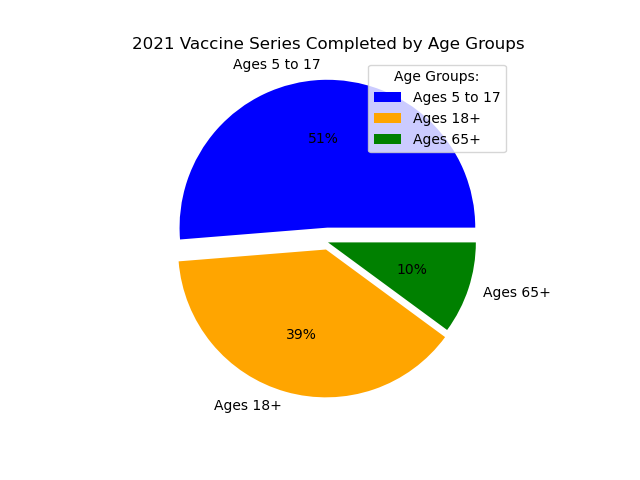

In [54]:
x = [24334851177, 18333519920, 4789010198]
# Labels for the sections of our pie chart
labels = ["Ages 5 to 17", "Ages 18+","Ages 65+"]

# The values of each section of the pie chart
sizes = [5, 6, 7]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0.05, 0)

fig, ax=plt.subplots()
ax.pie(x,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)

ax.set_title('2021 Vaccine Series Completed by Age Groups')
plt.legend(loc="upper right", title = "Age Groups:")
#Save and display the chart
plt.savefig("Images/2021 Completed Chart.png")
plt.show()

In [28]:
# Read the 2022 data 
Vaccine_2022_data = pd.read_csv(Vaccine_2022_data, low_memory=False)
Vaccine_2022_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct
0,1/1/2022,304073.4,203651784,153913.5,202815312,161194.1,0,0.0,198503867,174643.2,185982351,183524.9,47608688,241153.1
1,1/2/2022,304073.4,203651784,153913.5,202815312,161194.1,0,0.0,198503867,174643.2,185982351,183524.9,47608688,241153.1
2,1/3/2022,304073.4,203806777,154003.6,202970285,161292.7,0,0.0,198605013,174723.5,186071339,183604.2,47618212,241191.3
3,1/4/2022,304082.2,204066071,154236.5,203228542,161543.1,0,0.0,198775688,174923.1,186222069,183800.5,47635953,241285.1
4,1/5/2022,304076.9,204279021,154374.5,203440947,161685.1,0,0.0,198918773,175030.8,186348322,183909.8,47653004,241344.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,11/30/2022,309292.6,226205662,172036.4,225356179,181952.3,24490134,89987.1,216222798,194283.0,200866045,200902.4,51001743,259171.6
191,12/7/2022,309280.4,226440287,172173.5,225558808,182080.2,24521064,90085.1,216405856,194408.9,201037744,201032.2,51051230,259316.0
192,12/14/2022,309258.9,226666574,172294.6,225760344,182201.9,24549932,90170.0,216589832,194531.6,201210412,201157.0,51097415,259454.2
193,12/21/2022,309233.0,226822350,172391.2,225900063,182293.9,24569891,90238.1,216717283,194625.1,201330172,201254.2,51130875,259562.2


In [29]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2022_df = Vaccine_2022_data[["Date", "Series_Complete_Yes", "Series_Complete_5Plus", "Series_Complete_12Plus","Series_Complete_18Plus", "Series_Complete_65Plus"]]
Vaccine_2022_df

,Date,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,1/1/2022,203651784,202815312,198503867,185982351,47608688
1,1/2/2022,203651784,202815312,198503867,185982351,47608688
2,1/3/2022,203806777,202970285,198605013,186071339,47618212
3,1/4/2022,204066071,203228542,198775688,186222069,47635953
4,1/5/2022,204279021,203440947,198918773,186348322,47653004
...,...,...,...,...,...,...
190,11/30/2022,226205662,225356179,216222798,200866045,51001743
191,12/7/2022,226440287,225558808,216405856,201037744,51051230
192,12/14/2022,226666574,225760344,216589832,201210412,51097415
193,12/21/2022,226822350,225900063,216717283,201330172,51130875


In [30]:
Vaccine_2022_df["Ages 5 to 17"]=Vaccine_2022_data["Series_Complete_5Plus"]+Vaccine_2022_data["Series_Complete_12Plus"]

C:\Users\afoy0\AppData\Local\Temp\ipykernel_1460\57532379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2022_df["Ages 5 to 17"]=Vaccine_2022_data["Series_Complete_5Plus"]+Vaccine_2022_data["Series_Complete_12Plus"]


In [31]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
columns =["Date","Series_Complete_Yes", "Ages 5 to 17","Series_Complete_18Plus", "Series_Complete_65Plus"]
Vaccine_2022_df =Vaccine_2022_df.reindex(columns=columns)
Vaccine_2022_df.head()

,Date,Series_Complete_Yes,Ages 5 to 17,Series_Complete_18Plus,Series_Complete_65Plus
0,1/1/2022,203651784,401319179,185982351,47608688
1,1/2/2022,203651784,401319179,185982351,47608688
2,1/3/2022,203806777,401575298,186071339,47618212
3,1/4/2022,204066071,402004230,186222069,47635953
4,1/5/2022,204279021,402359720,186348322,47653004


In [32]:
#Rename Columns
Vaccine_2022_df = Vaccine_2022_df.rename(columns={"Series_Complete_Yes":"Series Complete",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+",
                                                        })
Vaccine_2022_df

,Date,Series Complete,Series Complete Ages 5 to 17,Series Complete Ages 18+,Series Complete Ages 65+
0,1/1/2022,203651784,401319179,185982351,47608688
1,1/2/2022,203651784,401319179,185982351,47608688
2,1/3/2022,203806777,401575298,186071339,47618212
3,1/4/2022,204066071,402004230,186222069,47635953
4,1/5/2022,204279021,402359720,186348322,47653004
...,...,...,...,...,...
190,11/30/2022,226205662,441578977,200866045,51001743
191,12/7/2022,226440287,441964664,201037744,51051230
192,12/14/2022,226666574,442350176,201210412,51097415
193,12/21/2022,226822350,442617346,201330172,51130875


In [64]:
# Export into a csv
Vaccine_2022_df.to_csv("output_data/Vaccine 2022", index_label="Vaccine 2022")

In [33]:
print(Vaccine_2022_df[['Series Complete','Series Complete Ages 5 to 17','Series Complete Ages 18+','Series Complete Ages 65+']].sum())

Series Complete                 42101659992
Series Complete Ages 5 to 17    82655796114
Series Complete Ages 18+        37769267884
Series Complete Ages 65+         9536767660
dtype: int64


<IPython.core.display.Javascript object>


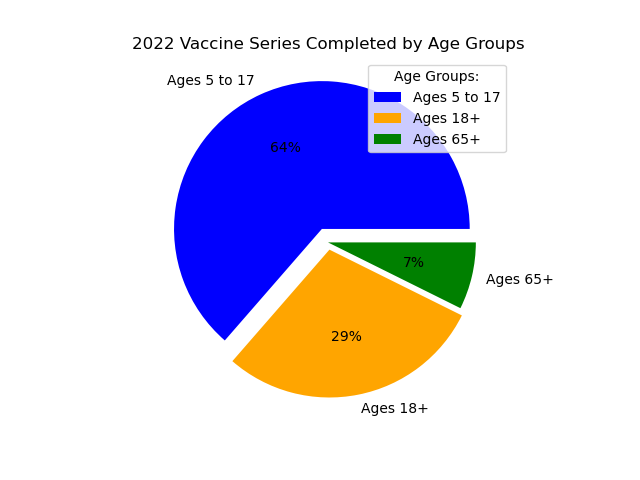

In [53]:
x2 = [82655796114, 37769267884, 9536767660]
# Labels for the sections of our pie chart
labels = ["Ages 5 to 17", "Ages 18+","Ages 65+"]

# The values of each section of the pie chart
sizes = [5, 6, 7]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0.05, 0)

fig, ax=plt.subplots()
ax.pie(x2,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)
plt.legend(loc="upper right", title = "Age Groups:")
ax.set_title('2022 Vaccine Series Completed by Age Groups')
#Save and display the chart
plt.savefig("Images/2022 Completed chart.png")
plt.show()

In [38]:
# Read the 2023 data 
Vaccine_2023_data = pd.read_csv(Vaccine_2023_data, low_memory=False)
Vaccine_2023_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct
0,1/4/2023,309206.1,227084848,172528.1,226132332,182426.7,24606594,90345.2,216926581,194756.7,201525738,201390.3,51176177,259697.0
1,1/11/2023,309239.8,227188019,172457.8,226214438,182354.1,24624943,90288.3,216995637,194685.2,201589495,201311.2,51180753,259561.1
2,1/18/2023,309238.3,227337074,172535.9,226343740,182434.5,24645872,90352.2,217111527,194763.7,201697868,201391.1,51207869,259640.5
3,1/25/2023,309238.3,227447877,172603.4,226436534,182492.5,24663291,90403.4,217193119,194821.9,201773243,201452.9,51225401,259698.0
4,2/1/2023,309238.3,227546999,172661.8,226519498,182546.7,24680428,90454.1,217265683,194874.8,201839070,201507.6,51239782,259744.3
5,2/8/2023,309228.1,227647851,172721.8,226604871,182604.5,24696630,90507.0,217340827,194930.2,201908241,201562.6,51255789,259791.8
6,2/15/2023,309212.1,227742152,172769.9,226684407,182645.8,24712335,90555.8,217410877,194975.4,201972072,201607.6,51267762,259826.2
7,2/22/2023,309212.1,227823651,172813.0,226753550,182687.6,24726811,90595.9,217471530,195017.0,202026739,201647.6,51278087,259857.3
8,3/1/2023,309203.7,227903153,172855.4,226822026,182732.9,24739048,90635.4,217533033,195058.7,202082978,201689.9,51287074,259888.8
9,3/8/2023,309193.4,227969062,172891.0,226875476,182762.6,24750082,90672.8,217579816,195088.1,202125394,201719.3,51294731,259906.3


In [39]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2023_df = Vaccine_2023_data[["Date", "Series_Complete_Yes", "Series_Complete_5Plus", "Series_Complete_12Plus","Series_Complete_18Plus", "Series_Complete_65Plus"]]
Vaccine_2023_df

,Date,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,1/4/2023,227084848,226132332,216926581,201525738,51176177
1,1/11/2023,227188019,226214438,216995637,201589495,51180753
2,1/18/2023,227337074,226343740,217111527,201697868,51207869
3,1/25/2023,227447877,226436534,217193119,201773243,51225401
4,2/1/2023,227546999,226519498,217265683,201839070,51239782
5,2/8/2023,227647851,226604871,217340827,201908241,51255789
6,2/15/2023,227742152,226684407,217410877,201972072,51267762
7,2/22/2023,227823651,226753550,217471530,202026739,51278087
8,3/1/2023,227903153,226822026,217533033,202082978,51287074
9,3/8/2023,227969062,226875476,217579816,202125394,51294731


In [40]:
Vaccine_2023_df["Ages 5 to 17"]=Vaccine_2023_data["Series_Complete_5Plus"]+Vaccine_2023_data["Series_Complete_12Plus"]

C:\Users\afoy0\AppData\Local\Temp\ipykernel_1460\3841423440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2023_df["Ages 5 to 17"]=Vaccine_2023_data["Series_Complete_5Plus"]+Vaccine_2023_data["Series_Complete_12Plus"]


In [41]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
columns =["Date","Series_Complete_Yes", "Ages 5 to 17","Series_Complete_18Plus", "Series_Complete_65Plus"]
Vaccine_2023_df =Vaccine_2023_df.reindex(columns=columns)
Vaccine_2023_df.head()

,Date,Series_Complete_Yes,Ages 5 to 17,Series_Complete_18Plus,Series_Complete_65Plus
0,1/4/2023,227084848,443058913,201525738,51176177
1,1/11/2023,227188019,443210075,201589495,51180753
2,1/18/2023,227337074,443455267,201697868,51207869
3,1/25/2023,227447877,443629653,201773243,51225401
4,2/1/2023,227546999,443785181,201839070,51239782


In [42]:
#Rename Columns
Vaccine_2023_df = Vaccine_2023_df.rename(columns={"Series_Complete_Yes":"Series Complete",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+",
                                                        })
Vaccine_2023_df

,Date,Series Complete,Series Complete Ages 5 to 17,Series Complete Ages 18+,Series Complete Ages 65+
0,1/4/2023,227084848,443058913,201525738,51176177
1,1/11/2023,227188019,443210075,201589495,51180753
2,1/18/2023,227337074,443455267,201697868,51207869
3,1/25/2023,227447877,443629653,201773243,51225401
4,2/1/2023,227546999,443785181,201839070,51239782
5,2/8/2023,227647851,443945698,201908241,51255789
6,2/15/2023,227742152,444095284,201972072,51267762
7,2/22/2023,227823651,444225080,202026739,51278087
8,3/1/2023,227903153,444355059,202082978,51287074
9,3/8/2023,227969062,444455292,202125394,51294731


In [63]:
# Export into a csv
Vaccine_2023_df.to_csv("output_data/Vaccine 2023", index_label="Vaccine 2023")

In [51]:
print(Vaccine_2023_df[['Series Complete','Series Complete Ages 5 to 17','Series Complete Ages 18+','Series Complete Ages 65+']].sum())

Series Complete                 4330102262
Series Complete Ages 5 to 17    8442117265
Series Complete Ages 18+        3839227983
Series Complete Ages 65+         974271832
dtype: int64


<IPython.core.display.Javascript object>


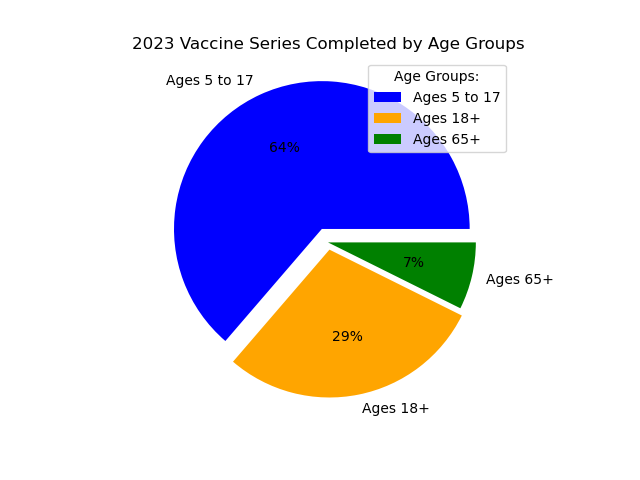

In [52]:
x3 = [8442117265, 3839227983, 974271832]
# Labels for the sections of our pie chart
labels = ["Ages 5 to 17", "Ages 18+","Ages 65+"]

# The values of each section of the pie chart
sizes = [5, 6, 7]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0.05, 0)

fig, ax=plt.subplots()
ax.pie(x3,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)
plt.legend(loc="upper right", title = "Age Groups:")
ax.set_title('2023 Vaccine Series Completed by Age Groups')
#Save and display the chart
plt.savefig("Images/2023 Completed chart.png")
plt.show()

<IPython.core.display.Javascript object>


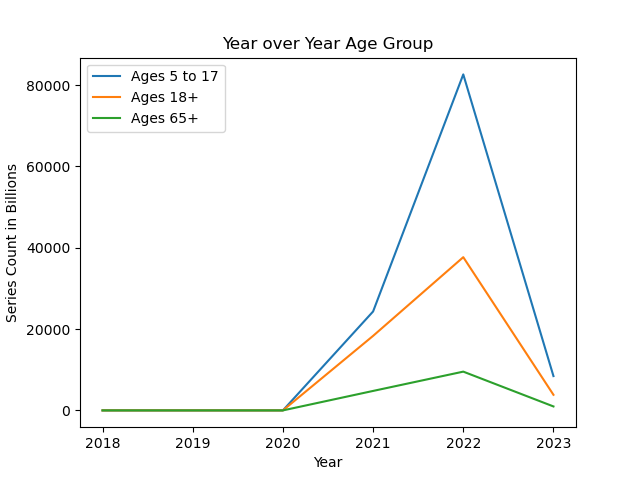

In [58]:
Vaccine_Data = pd.DataFrame({
    'Ages 5 to 17':[0,0,0,24334,82655,8442],
    'Ages 18+':[0,0,0,18333,37692,3839],
    'Ages 65+':[0,0,0,4789,9536,974]
    }, index=[2018,2019,2020,2021, 2022, 2023])
Vaccine_Data.plot(xlabel="Year", ylabel="Series Count in Billions", title="Year over Year Age Group")
#Save and display the chart
plt.savefig("Images/Year over Year chart.png")